In [1]:
import PIL.ImageGrab
import pyautogui
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
points = {"Wizard":(770,680),
            "Heli" : (580,520),
            "Home" : (830,820),
            "Tack1" : (835,350),
            "Tack2" : (835,790),
            "Restart1" : (1085,810),
            "Restart2" : (1130,720),
            "Next" : (960,900),
            "ClearMonkey" : (1750,820),
            "CleanClick" : (600,100),
            "HeliStay" : (410,400),
            "Start" : (1815,1005),
            "Upgrade1" : (1480,490),
            "Upgrade2" : (1480,635),
            "Upgrade3" : (1480,780),
            "Play" : (835,920),
            "Expert" : (1325,975),
            "Infernal" : (960,255),
            "Hard" : (1280,420),
            "Chimps" : (1590,730),
         }
keys = {"Wizard":'a',
         "Heli" : 'b',
        "Tack1" : 'r',
        "Tack2" : 'r',
        "Upgrade1" : ",",
        "Upgrade2" : ".",
        "Upgrade3" : "/",
        "Clear" : "Esc",
        "Start" : "space",
        "Ability1" : "1",
         }

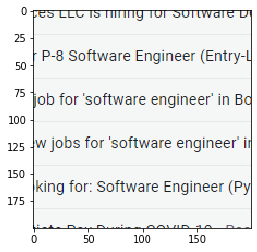

233.35095
False


In [3]:
def getSnap(debug=False):
    im = PIL.ImageGrab.grab()
    if (debug):
        img = np.array(im)
        plt.imshow(img)
        plt.show()
    print(img.shape)
    return np.array(im)

def getSquare(point,width = 100,height=100,debug=False):
    centerX,centerY = point
    im = PIL.ImageGrab.grab()
    img = np.array(im)
    img = img[(centerY-height):(centerY+height),(centerX-width):(centerX+width)]
    if (debug):
        plt.imshow(img)
        plt.show()
    return img

def upgradeMonkey(name,upgrade,times=1,debug=False):
    pyautogui.click(points["CleanClick"])
    time.sleep(.3)
    pyautogui.click(points[name])
    for i in range(times):
        print("Upgrading monkey: " + str(name) + " to " + str(upgrade))
        pyautogui.keyDown(keys[upgrade])
        pyautogui.keyUp(keys[upgrade])

def gameOver(debug=False):
    img = getSquare(points["Restart1"],width=60,height=60,debug=debug)
    nex = np.floor(np.mean(getSquare(points["Next"],width=100,height=20)[:,:,1]))
    if (np.floor(np.mean(img)) == 173 or nex == 203):
        print("Game Over")
        return True
    return False
    
def roundOver(debug=False):
    img = getSquare(points['Start'],width=10,height=10,debug=debug)
    if ( np.floor(np.mean(img)) >= 254):
        print("Round Over")
        return True
    return False  

def checkFF(debug=False):
    img = getSquare(points['Start'],width=10,height=10,debug=debug)
    if ( np.floor(np.mean(img)) <= 190):
        startRound()
        print("^Fast Forwarded")

def placeMonkey(name,debug=False):
    try:
        if (debug):
            i = 3
            while (i > 0):
                time.sleep(1)
                print("Placing in " + str(i),end='\r')
                i -= 1
            print()
        print("Dropping " + name)
        pyautogui.moveTo(points[name])
        pyautogui.keyDown(keys[name])
        pyautogui.keyUp(keys[name])
        pyautogui.click(points[name])
        pyautogui.moveTo(points["ClearMonkey"])
        return True
    except:
        print("Broke on drop")
    return False     

def startRound(debug=False):
    print("Starting new Round")
    pyautogui.click(points["CleanClick"])
    pyautogui.keyDown(keys["Start"])
    pyautogui.keyUp(keys["Start"])

def placeMonkeys():
    pyautogui.click(points["CleanClick"])
    pyautogui.click(points["CleanClick"])
#     time.sleep(1)
    placeMonkey("Tack1")
    pyautogui.click(points["CleanClick"])
    pyautogui.click(points["CleanClick"])
    upgradeMonkey("Tack1","Upgrade3",times=5)
#     time.sleep(1)
    upgradeMonkey("Tack1","Upgrade2",times=2)
#     time.sleep(.2)
    placeMonkey("Tack2")
#     time.sleep(.2)
    upgradeMonkey("Tack2","Upgrade1",times=5)
#     time.sleep(1)
    upgradeMonkey("Tack2","Upgrade2",times=2)
#     time.sleep(.2)
    

def restartGame():
    
#     pyautogui.keyDown(keys[name])
#     pyautogui.keyUp(keys[name])
    time.sleep(.5)
    pyautogui.click(points["Play"])
    time.sleep(.5)
    pyautogui.click(points["Expert"])
    time.sleep(.5)
    pyautogui.click(points["Infernal"])
    time.sleep(.5)
    pyautogui.click(points["Hard"])
    time.sleep(.5)
    pyautogui.click(points["Chimps"])
    
print(np.mean(getSquare((830,820),width=100,height=100,debug=True)[:,:,1]))
print(gameOver())
# restartGame()
# time.sleep(1)
# placeMonkeys()

In [4]:
def playGame(rnd=5,state=0,debug=False):
    i = 3
    while (i > 0):
        time.sleep(1)
        print("Starting Play in " + str(i),end='\r')
        i -= 1
    print("\nPlayin")
    restartGame()
    time.sleep(3)
    placeMonkeys()
    i = 0
    while (not(gameOver(debug=debug))):
        if (i > 10):
            pyautogui.click(points["CleanClick"])
            i = 0
        i+=1
        if (roundOver(debug=debug)):
            print("Round ended: " + str(rnd))
            startRound(debug=debug)
            checkFF()
            rnd+=1
        else:
            time.sleep(1)
    pyautogui.click(points["Next"])
    time.sleep(1)
    pyautogui.click(points["Home"])
    playGame()
playGame()

Starting Play in 1
Playin
Dropping Tack1
Upgrading monkey: Tack1 to Upgrade3
Upgrading monkey: Tack1 to Upgrade3
Upgrading monkey: Tack1 to Upgrade3
Upgrading monkey: Tack1 to Upgrade3
Upgrading monkey: Tack1 to Upgrade3
Upgrading monkey: Tack1 to Upgrade2
Upgrading monkey: Tack1 to Upgrade2
Dropping Tack2
Upgrading monkey: Tack2 to Upgrade1
Upgrading monkey: Tack2 to Upgrade1
Upgrading monkey: Tack2 to Upgrade1
Upgrading monkey: Tack2 to Upgrade1
Upgrading monkey: Tack2 to Upgrade1
Upgrading monkey: Tack2 to Upgrade2
Upgrading monkey: Tack2 to Upgrade2
Round Over
Round ended: 5
Starting new Round
Starting new Round
^Fast Forwarded
Game Over
Starting Play in 1
Playin
Dropping Tack1
Upgrading monkey: Tack1 to Upgrade3
Upgrading monkey: Tack1 to Upgrade3
Upgrading monkey: Tack1 to Upgrade3
Upgrading monkey: Tack1 to Upgrade3
Upgrading monkey: Tack1 to Upgrade3
Upgrading monkey: Tack1 to Upgrade2
Upgrading monkey: Tack1 to Upgrade2
Dropping Tack2
Upgrading monkey: Tack2 to Upgrade1
Upgrad

Round Over
Round ended: 49
Starting new Round
Round Over
Round ended: 50
Starting new Round
Round Over
Round ended: 51
Starting new Round
Round Over
Round ended: 52
Starting new Round
Round Over
Round ended: 53
Starting new Round
Round Over
Round ended: 54
Starting new Round
Round Over
Round ended: 55
Starting new Round
Round Over
Round ended: 56
Starting new Round
Round Over
Round ended: 57
Starting new Round
Round Over
Round ended: 58
Starting new Round
Round Over
Round ended: 59
Starting new Round
Round Over
Round ended: 60
Starting new Round
Round Over
Round ended: 61
Starting new Round
Round Over
Round ended: 62
Starting new Round
Round Over
Round ended: 63
Starting new Round
Round Over
Round ended: 64
Starting new Round
Round Over
Round ended: 65
Starting new Round
Round Over
Round ended: 66
Starting new Round
Round Over
Round ended: 67
Starting new Round
Round Over
Round ended: 68
Starting new Round
Round Over
Round ended: 69
Starting new Round
Round Over
Round ended: 70
Startin

Round Over
Round ended: 10
Starting new Round
Round Over
Round ended: 11
Starting new Round
Round Over
Round ended: 12
Starting new Round
Round Over
Round ended: 13
Starting new Round
Round Over
Round ended: 14
Starting new Round
Round Over
Round ended: 15
Starting new Round
Round Over
Round ended: 16
Starting new Round
Round Over
Round ended: 17
Starting new Round
Round Over
Round ended: 18
Starting new Round
Round Over
Round ended: 19
Starting new Round
Round Over
Round ended: 20
Starting new Round
Round Over
Round ended: 21
Starting new Round
Round Over
Round ended: 22
Starting new Round
Round Over
Round ended: 23
Starting new Round
Round Over
Round ended: 24
Starting new Round
Round Over
Round ended: 25
Starting new Round
Round Over
Round ended: 26
Starting new Round
Round Over
Round ended: 27
Starting new Round
Round Over
Round ended: 28
Starting new Round
Round Over
Round ended: 29
Starting new Round
Round Over
Round ended: 30
Starting new Round
Round Over
Round ended: 31
Startin

Round Over
Round ended: 81
Starting new Round
Round Over
Round ended: 82
Starting new Round
Round Over
Round ended: 83
Starting new Round
Round Over
Round ended: 84
Starting new Round
Round Over
Round ended: 85
Starting new Round
Round Over
Round ended: 86
Starting new Round
Round Over
Round ended: 87
Starting new Round
Round Over
Round ended: 88
Starting new Round
Round Over
Round ended: 89
Starting new Round
Round Over
Round ended: 90
Starting new Round
Round Over
Round ended: 91
Starting new Round
Round Over
Round ended: 92
Starting new Round
Round Over
Round ended: 93
Starting new Round
Round Over
Round ended: 94
Starting new Round
Round Over
Round ended: 95
Starting new Round
Round Over
Round ended: 96
Starting new Round
Round Over
Round ended: 97
Starting new Round
Round Over
Round ended: 98
Starting new Round
Round Over
Round ended: 99
Starting new Round
Game Over
Starting Play in 1
Playin
Dropping Tack1
Upgrading monkey: Tack1 to Upgrade3
Upgrading monkey: Tack1 to Upgrade3
Upg

Round Over
Round ended: 44
Starting new Round
Round Over
Round ended: 45
Starting new Round
Round Over
Round ended: 46
Starting new Round
Round Over
Round ended: 47
Starting new Round
Round Over
Round ended: 48
Starting new Round
Round Over
Round ended: 49
Starting new Round
Round Over
Round ended: 50
Starting new Round
Round Over
Round ended: 51
Starting new Round
Round Over
Round ended: 52
Starting new Round
Round Over
Round ended: 53
Starting new Round
Round Over
Round ended: 54
Starting new Round
Round Over
Round ended: 55
Starting new Round
Round Over
Round ended: 56
Starting new Round
Round Over
Round ended: 57
Starting new Round
Round Over
Round ended: 58
Starting new Round
Round Over
Round ended: 59
Starting new Round
Round Over
Round ended: 60
Starting new Round
Round Over
Round ended: 61
Starting new Round
Round Over
Round ended: 62
Starting new Round
Round Over
Round ended: 63
Starting new Round
Round Over
Round ended: 64
Starting new Round
Round Over
Round ended: 65
Startin

Round Over
Round ended: 6
Starting new Round
Round Over
Round ended: 7
Starting new Round
Round Over
Round ended: 8
Starting new Round
Round Over
Round ended: 9
Starting new Round
Round Over
Round ended: 10
Starting new Round
Round Over
Round ended: 11
Starting new Round
Round Over
Round ended: 12
Starting new Round
Round Over
Round ended: 13
Starting new Round
Round Over
Round ended: 14
Starting new Round
Round Over
Round ended: 15
Starting new Round
Round Over
Round ended: 16
Starting new Round
Round Over
Round ended: 17
Starting new Round
Round Over
Round ended: 18
Starting new Round
Round Over
Round ended: 19
Starting new Round
Round Over
Round ended: 20
Starting new Round
Round Over
Round ended: 21
Starting new Round
Round Over
Round ended: 22
Starting new Round
Round Over
Round ended: 23
Starting new Round
Round Over
Round ended: 24
Starting new Round
Round Over
Round ended: 25
Starting new Round
Round Over
Round ended: 26
Starting new Round
Round Over
Round ended: 27
Starting ne

Round Over
Round ended: 77
Starting new Round
Round Over
Round ended: 78
Starting new Round
Round Over
Round ended: 79
Starting new Round
Round Over
Round ended: 80
Starting new Round
Round Over
Round ended: 81
Starting new Round
Round Over
Round ended: 82
Starting new Round
Round Over
Round ended: 83
Starting new Round
Round Over
Round ended: 84
Starting new Round
Round Over
Round ended: 85
Starting new Round
Round Over
Round ended: 86
Starting new Round
Round Over
Round ended: 87
Starting new Round
Round Over
Round ended: 88
Starting new Round
Round Over
Round ended: 89
Starting new Round
Round Over
Round ended: 90
Starting new Round
Round Over
Round ended: 91
Starting new Round
Round Over
Round ended: 92
Starting new Round
Round Over
Round ended: 93
Starting new Round
Round Over
Round ended: 94
Starting new Round
Round Over
Round ended: 95
Starting new Round
Round Over
Round ended: 96
Starting new Round
Round Over
Round ended: 97
Starting new Round
Round Over
Round ended: 98
Startin

Round Over
Round ended: 40
Starting new Round
Round Over
Round ended: 41
Starting new Round
Round Over
Round ended: 42
Starting new Round
Round Over
Round ended: 43
Starting new Round
Round Over
Round ended: 44
Starting new Round
Round Over
Round ended: 45
Starting new Round
Round Over
Round ended: 46
Starting new Round
Round Over
Round ended: 47
Starting new Round
Round Over
Round ended: 48
Starting new Round
Round Over
Round ended: 49
Starting new Round
Round Over
Round ended: 50
Starting new Round
Round Over
Round ended: 51
Starting new Round
Round Over
Round ended: 52
Starting new Round
Round Over
Round ended: 53
Starting new Round
Round Over
Round ended: 54
Starting new Round
Round Over
Round ended: 55
Starting new Round
Round Over
Round ended: 56
Starting new Round
Round Over
Round ended: 57
Starting new Round
Round Over
Round ended: 58
Starting new Round
Round Over
Round ended: 59
Starting new Round
Round Over
Round ended: 60
Starting new Round
Round Over
Round ended: 61
Startin

Upgrading monkey: Tack2 to Upgrade2
Upgrading monkey: Tack2 to Upgrade2
Round Over
Round ended: 5
Starting new Round
Starting new Round
^Fast Forwarded
Round Over
Round ended: 6
Starting new Round
Round Over
Round ended: 7
Starting new Round
Round Over
Round ended: 8
Starting new Round
Round Over
Round ended: 9
Starting new Round
Round Over
Round ended: 10
Starting new Round
Round Over
Round ended: 11
Starting new Round
Round Over
Round ended: 12
Starting new Round
Round Over
Round ended: 13
Starting new Round
Round Over
Round ended: 14
Starting new Round
Round Over
Round ended: 15
Starting new Round
Round Over
Round ended: 16
Starting new Round
Round Over
Round ended: 17
Starting new Round
Round Over
Round ended: 18
Starting new Round
Round Over
Round ended: 19
Starting new Round
Round Over
Round ended: 20
Starting new Round
Round Over
Round ended: 21
Starting new Round
Round Over
Round ended: 22
Starting new Round
Round Over
Round ended: 23
Starting new Round
Round Over
Round ended: 

Round Over
Round ended: 73
Starting new Round
Round Over
Round ended: 74
Starting new Round
Round Over
Round ended: 75
Starting new Round
Round Over
Round ended: 76
Starting new Round
Round Over
Round ended: 77
Starting new Round
Round Over
Round ended: 78
Starting new Round
Round Over
Round ended: 79
Starting new Round
Round Over
Round ended: 80
Starting new Round
Round Over
Round ended: 81
Starting new Round
Round Over
Round ended: 82
Starting new Round
Round Over
Round ended: 83
Starting new Round
Round Over
Round ended: 84
Starting new Round
Round Over
Round ended: 85
Starting new Round
Round Over
Round ended: 86
Starting new Round
Round Over
Round ended: 87
Starting new Round
Round Over
Round ended: 88
Starting new Round
Round Over
Round ended: 89
Starting new Round
Round Over
Round ended: 90
Starting new Round
Round Over
Round ended: 91
Starting new Round
Round Over
Round ended: 92
Starting new Round
Round Over
Round ended: 93
Starting new Round
Round Over
Round ended: 94
Startin

KeyboardInterrupt: 